In [72]:
import numpy as np #math operations
import matplotlib.pyplot as plt #basic visualization
import pandas as pd #data wrangling
import seaborn as sns #visualization

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,roc_auc_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from collections import Counter

#Binary classification

###Generate data

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1000, 10) (1000,)
Class 1  499
Class 0  501


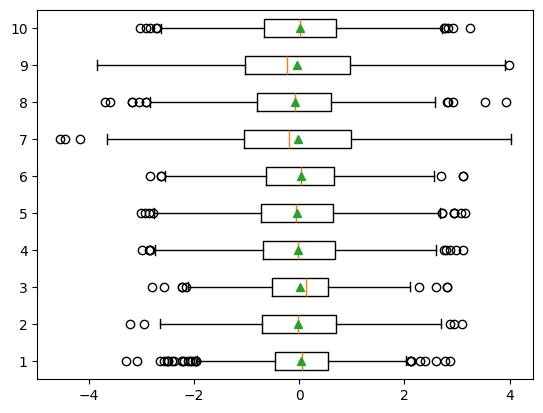

In [104]:
x,y = make_classification(n_samples = 1000, n_features = 10,n_classes=2,random_state = 42)

print(type(x),type(y))
print(x.shape, y.shape)
print("Class 1 ",len(y[y==1]))
print("Class 0 ",len(y[y==0]))

plt.boxplot(x,orientation="horizontal",showmeans = True, )
%matplotlib inline

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state = 42)
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(700, 10)
(700,)

(300, 10)
(300,)


###Experiment 1 - vanilla

In [106]:
logistic = LogisticRegression( )
logistic.fit(x_train,y_train)

y_pred = logistic.predict(x_test)

TP = sum((y_pred==y_test)& (y_pred==1))
TN = sum((y_pred==y_test)& (y_pred==0))

FP = sum((y_pred!=y_test)& (y_pred==1))
FN = sum((y_pred!=y_test)& (y_pred==0))

Accuracy = (TP+TN)/(TP+FP+TN+FN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = (2*Precision*Recall)/(Precision + Recall)

print("TP = ",TP)
print("TN = ",TN)
print("FP = ",FP)
print("FN = ",FN)
print()

print("Accuracy:",round(Accuracy,2))
print("Precision:",round(Precision,2))
print("Recall:",round(Recall,2))
print("F1:", round(F1,2))

TP =  136
TN =  118
FP =  17
FN =  29

Accuracy: 0.85
Precision: 0.89
Recall: 0.82
F1: 0.86


###Experiment 2 - changing regularization

In [5]:
logistic = LogisticRegression( penalty = "l1",solver = "liblinear" )
logistic.fit(x_train,y_train)

y_pred = logistic.predict(x_test)

TP = sum((y_pred==y_test)& (y_pred==1))
TN = sum((y_pred==y_test)& (y_pred==0))

FP = sum((y_pred!=y_test)& (y_pred==1))
FN = sum((y_pred!=y_test)& (y_pred==0))

Accuracy = (TP+TN)/(TP+FP+TN+FN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = (2*Precision*Recall)/(Precision + Recall)

print("TP = ",TP)
print("TN = ",TN)
print("FP = ",FP)
print("FN = ",FN)
print()

print("Accuracy:",round(Accuracy,2))
print("Precision:",round(Precision,2))
print("Recall:",round(Recall,2))
print("F1:", round(F1,2))

TP =  135
TN =  118
FP =  17
FN =  30

Accuracy: 0.84
Precision: 0.89
Recall: 0.82
F1: 0.85


###Experiment 3 - increasing L2 alpha

In [6]:
logistic = LogisticRegression( C=0.1)
logistic.fit(x_train,y_train)

y_pred = logistic.predict(x_test)

TP = sum((y_pred==y_test)& (y_pred==1))
TN = sum((y_pred==y_test)& (y_pred==0))

FP = sum((y_pred!=y_test)& (y_pred==1))
FN = sum((y_pred!=y_test)& (y_pred==0))

Accuracy = (TP+TN)/(TP+FP+TN+FN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = (2*Precision*Recall)/(Precision + Recall)

print("TP = ",TP)
print("TN = ",TN)
print("FP = ",FP)
print("FN = ",FN)
print()

print("Accuracy:",round(Accuracy,2))
print("Precision:",round(Precision,2))
print("Recall:",round(Recall,2))
print("F1:", round(F1,2))

TP =  136
TN =  120
FP =  15
FN =  29

Accuracy: 0.85
Precision: 0.9
Recall: 0.82
F1: 0.86


###Experiment 4 - reducing threshold to improve recall

In [7]:
logistic = LogisticRegression( C=0.4)
logistic.fit(x_train,y_train)

y_prob = logistic.predict_proba(x_test)
y_pred = np.argmax(y_prob,axis = 1)

y_prob = logistic.predict_proba(x_test)[:,1]
y_pred = np.array([1 if i>0.4 else 0 for i in y_prob])

TP = sum((y_pred==y_test)& (y_pred==1))
TN = sum((y_pred==y_test)& (y_pred==0))

FP = sum((y_pred!=y_test)& (y_pred==1))
FN = sum((y_pred!=y_test)& (y_pred==0))

Accuracy = (TP+TN)/(TP+FP+TN+FN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = (2*Precision*Recall)/(Precision + Recall)

print("TP = ",TP)
print("TN = ",TN)
print("FP = ",FP)
print("FN = ",FN)
print()

print("Accuracy:",round(Accuracy,2))
print("Precision:",round(Precision,2))
print("Recall:",round(Recall,2))
print("F1:", round(F1,2))

TP =  143
TN =  113
FP =  22
FN =  22

Accuracy: 0.85
Precision: 0.87
Recall: 0.87
F1: 0.87


###Performance metrics

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

score = accuracy_score(y_test,y_pred)
print(score)

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test,y_pred))

0.8533333333333334
[[113  22]
 [ 22 143]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       135
           1       0.87      0.87      0.87       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



### Analyzing misclassified cases

Let's examine the `x` values (features) for the instances that the model misclassified. This can help us understand where the model struggled.

In [9]:
# Find indices of misclassified samples
misclassified_indices = np.where(y_pred != y_test)[0]

# Get the features (x_test) for misclassified samples
x_misclassified = x_test[misclassified_indices]

# Get the true labels (y_test) for misclassified samples
y_true_misclassified = y_test[misclassified_indices]

# Get the predicted labels (y_pred) for misclassified samples
y_pred_misclassified = y_pred[misclassified_indices]

print(f"Number of misclassified samples: {len(misclassified_indices)}")
print("\nFeatures (x_test) of misclassified samples (first 5 rows):\n")
# Display as a DataFrame for better readability, if pandas is available
if 'pd' in globals():
    df_misclassified = pd.DataFrame(x_misclassified, columns=[f'Feature_{i+1}' for i in range(x_misclassified.shape[1])])
    df_misclassified['True_Label'] = y_true_misclassified
    df_misclassified['Predicted_Label'] = y_pred_misclassified
    display(df_misclassified.head())
else:
    for i in range(min(5, len(misclassified_indices))):
        print(f"  True Label: {y_true_misclassified[i]}, Predicted Label: {y_pred_misclassified[i]}")
        print(f"  Features: {x_misclassified[i]}")
        print("-" * 30)

Number of misclassified samples: 44

Features (x_test) of misclassified samples (first 5 rows):



,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,True_Label,Predicted_Label
0,-0.144079,-0.009289,0.023662,0.306981,-0.175378,0.491506,-0.281049,-0.342879,0.652572,1.813408,1,0
1,0.530510,-0.970124,0.522076,-0.397558,1.036088,-1.422975,-0.825755,0.379768,-0.412382,1.237654,1,0
2,0.349892,0.040919,0.220160,-1.002187,-0.544114,-0.162793,-0.165382,-0.513214,-0.677684,0.740824,0,1
3,0.660862,-1.059212,0.528613,-0.500261,-0.602624,0.001783,-0.656827,2.124556,-0.911480,-0.516117,1,0
4,0.632024,0.290897,0.645951,-1.995532,-0.059826,0.493560,-1.056985,0.929410,-0.412960,-1.121244,1,0


Retrieve the `coef_` and `intercept_` from the trained `logistic` regression model, compute the log-odds and probabilities for `x_test`, and then plot the probabilities against the log-odds to visualize the S-curve. Finally, provide an interpretation of the S-curve and the regression coefficients.


Extract the `coef_` (coefficients for each feature) and `intercept_` from the trained `logistic` regression model. These are the parameters that define the decision boundary and the S-curve.


**Reasoning**:
Retrieve the coefficients and intercept from the trained logistic regression model as instructed and print them.



In [10]:
coefficients = logistic.coef_
intercept = logistic.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-0.44153279  0.10792928 -0.72238168  0.07806684 -0.06447603 -0.26730317
   1.56645584 -0.00826109 -0.59733615  0.05409886]]
Intercept: [0.08734371]


**Reasoning**:
The previous subtask of extracting coefficients and intercept is complete. The next step is to compute the log-odds for the `x_test` data using these extracted parameters. Log-odds are calculated as the dot product of `x_test` with the `coefficients` plus the `intercept`.



In [11]:
log_odds = np.dot(x_test, coefficients.T) + intercept

print("Log-odds shape:", log_odds.shape)
print("First 5 log-odds values:\n", log_odds[:5])

Log-odds shape: (300, 1)
First 5 log-odds values:
 [[-1.21142496]
 [ 3.2856631 ]
 [-0.69236448]
 [ 2.36874073]
 [-3.61498988]]


**Reasoning**:
With the log-odds computed, the next step is to convert these log-odds into probabilities using the sigmoid function (1 / (1 + exp(-log_odds))). This is a crucial step in logistic regression as it transforms the linear output into a probability score between 0 and 1.



In [12]:
probabilities = 1 / (1 + np.exp(-log_odds))

print("Probabilities shape:", probabilities.shape)
print("First 5 probability values:\n", probabilities[:5])

Probabilities shape: (300, 1)
First 5 probability values:
 [[0.22944902]
 [0.96393368]
 [0.33350729]
 [0.91441236]
 [0.02621165]]


**Reasoning**:
Now that both log-odds and probabilities have been computed, the next step is to visualize their relationship. Plotting probabilities against log-odds will illustrate the characteristic S-curve of the sigmoid function in logistic regression, which transforms the linear log-odds into a probability range of 0 to 1.



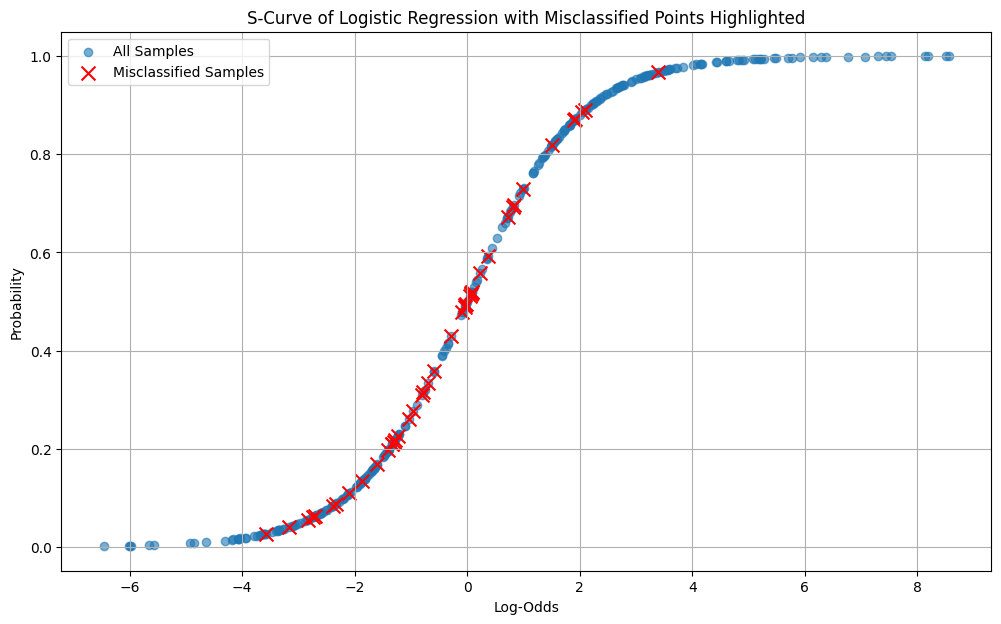

In [13]:
# Calculate log-odds and probabilities for misclassified samples
log_odds_misclassified = np.dot(x_misclassified, coefficients.T) + intercept
probabilities_misclassified = 1 / (1 + np.exp(-log_odds_misclassified))

plt.figure(figsize=(12, 7))
# Plot all points
plt.scatter(log_odds, probabilities, alpha=0.6, label='All Samples')
# Overlay misclassified points
plt.scatter(log_odds_misclassified, probabilities_misclassified, color='red', marker='x', s=100, label='Misclassified Samples')

plt.xlabel("Log-Odds")
plt.ylabel("Probability")
plt.title("S-Curve of Logistic Regression with Misclassified Points Highlighted")
plt.grid(True)
plt.legend()
plt.show()

### Hyperparameter tuning & cross validation

Grid Search

In [28]:
model = LogisticRegression()

#penalty = ['l1','l2','elasticnet']
penalty = ['l2']

c_values = [100,10,1.0,0.1,0.01]
#solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
solvers = ['newton-cg','lbfgs','sag','saga']

params = dict(penalty = penalty,C = c_values,solver = solvers )
params


{'penalty': ['l2'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}

In [30]:
for ip in range(len(params["penalty"])):
  for ic in range(len(params["C"])):
    for isx in range(len(params["solver"])):
      logistic = LogisticRegression( penalty = params["penalty"][ip],solver = params["solver"][isx],C = params["C"][ic] )

      logistic.fit(x_train,y_train)

      y_pred = logistic.predict(x_test)

      TP = sum((y_pred==y_test)& (y_pred==1))
      TN = sum((y_pred==y_test)& (y_pred==0))

      FP = sum((y_pred!=y_test)& (y_pred==1))
      FN = sum((y_pred!=y_test)& (y_pred==0))

      Accuracy = (TP+TN)/(TP+FP+TN+FN)
      Precision = TP/(TP+FP)
      Recall = TP/(TP+FN)
      F1 = (2*Precision*Recall)/(Precision + Recall)
      print(f"penalty : {params["penalty"][ip]}; C : {params["C"][ic]}; solver : {params["solver"][isx]}")

      print("Accuracy:",round(Accuracy,2))
      print("Precision:",round(Precision,2))
      print("Recall:",round(Recall,2))
      print("F1:", round(F1,2))
      print()


penalty : l2; C : 100; solver : newton-cg
Accuracy: 0.84
Precision: 0.88
Recall: 0.82
F1: 0.85

penalty : l2; C : 100; solver : lbfgs
Accuracy: 0.84
Precision: 0.88
Recall: 0.82
F1: 0.85

penalty : l2; C : 100; solver : sag
Accuracy: 0.84
Precision: 0.88
Recall: 0.82
F1: 0.85

penalty : l2; C : 100; solver : saga
Accuracy: 0.84
Precision: 0.88
Recall: 0.82
F1: 0.85

penalty : l2; C : 10; solver : newton-cg
Accuracy: 0.84
Precision: 0.88
Recall: 0.82
F1: 0.85

penalty : l2; C : 10; solver : lbfgs
Accuracy: 0.84
Precision: 0.88
Recall: 0.82
F1: 0.85

penalty : l2; C : 10; solver : sag
Accuracy: 0.84
Precision: 0.88
Recall: 0.82
F1: 0.85

penalty : l2; C : 10; solver : saga
Accuracy: 0.84
Precision: 0.88
Recall: 0.82
F1: 0.85

penalty : l2; C : 1.0; solver : newton-cg
Accuracy: 0.85
Precision: 0.89
Recall: 0.82
F1: 0.86

penalty : l2; C : 1.0; solver : lbfgs
Accuracy: 0.85
Precision: 0.89
Recall: 0.82
F1: 0.86

penalty : l2; C : 1.0; solver : sag
Accuracy: 0.85
Precision: 0.89
Recall: 0.8

In [36]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression()
cv = StratifiedKFold()

grid = GridSearchCV(estimator = model,param_grid = params,scoring ='accuracy',cv = cv,n_jobs = -1 )
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring='accuracy')

In [37]:
print(grid)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring='accuracy')


In [38]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring='accuracy')

In [39]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [44]:
grid.best_score_

np.float64(0.8785714285714287)

In [45]:
y_pred = grid.predict(x_test)
score = accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       157
           1       0.80      0.92      0.86       143

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300

[[124  33]
 [ 11 132]]


Random Search

In [51]:
randomcv = RandomizedSearchCV(estimator = model,param_distributions = params,scoring ='accuracy',cv = 5,n_jobs = -1 )
randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [52]:
randomcv.best_score_

np.float64(0.8785714285714287)

In [54]:
print(randomcv.best_params_)
print(grid.best_params_)

{'solver': 'saga', 'penalty': 'l2', 'C': 0.01}
{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [56]:
y_pred = randomcv.predict(x_test)
score = accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       157
           1       0.80      0.92      0.86       143

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300

[[124  33]
 [ 11 132]]


#Multiclass classification

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1000, 10) (1000,)
Class 2  335
Class 1  331
Class 0  334


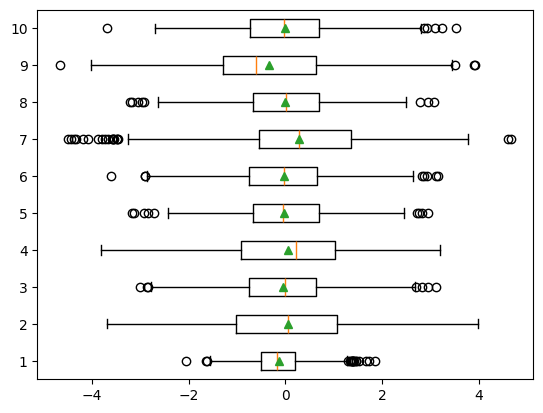

In [59]:
x,y = make_classification(n_samples = 1000, n_features = 10,n_informative = 3,n_classes=3,random_state = 42)

print(type(x),type(y))
print(x.shape, y.shape)
print("Class 2 ",len(y[y==2]))
print("Class 1 ",len(y[y==1]))
print("Class 0 ",len(y[y==0]))

plt.boxplot(x,orientation="horizontal",showmeans = True, )
%matplotlib inline

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state = 42)
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(700, 10)
(700,)

(300, 10)
(300,)


In [63]:
logistic = LogisticRegression(multi_class='ovr')
logistic.fit(x_train,y_train)
y_pred = logistic.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [66]:
score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.68
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       113
           1       0.40      0.58      0.47        65
           2       0.86      0.71      0.78       122

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.72      0.68      0.70       300

[[79 31  3]
 [16 38 11]
 [ 8 27 87]]


In [67]:
randomcv = RandomizedSearchCV(estimator = logistic,param_distributions = params,scoring ='accuracy',cv = 5,n_jobs = -1 )
randomcv.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(multi_class='ovr'),
                   n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [68]:
randomcv.best_score_

np.float64(0.6385714285714286)

In [71]:
grid = GridSearchCV(estimator = logistic,param_grid = params,scoring ='accuracy',cv = cv,n_jobs = -1 )
grid.fit(x_train,y_train)
grid.best_score_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


np.float64(0.6385714285714286)

#Imbalanced Data

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(10000, 2) (10000,)
Class 1  155
Class 0  9845


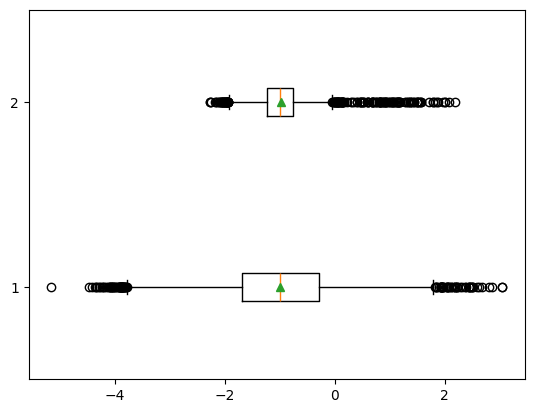

In [114]:
x,y = make_classification(n_samples = 10000, n_features = 2,n_clusters_per_class= 1,n_redundant = 0,weights = [0.99],random_state = 55)

print(type(x),type(y))
print(x.shape, y.shape)
print("Class 1 ",len(y[y==1]))
print("Class 0 ",len(y[y==0]))

plt.boxplot(x,orientation="horizontal",showmeans = True, )
%matplotlib inline

In [115]:
Counter(y)

Counter({np.int64(0): 9845, np.int64(1): 155})

<Axes: xlabel='0', ylabel='1'>

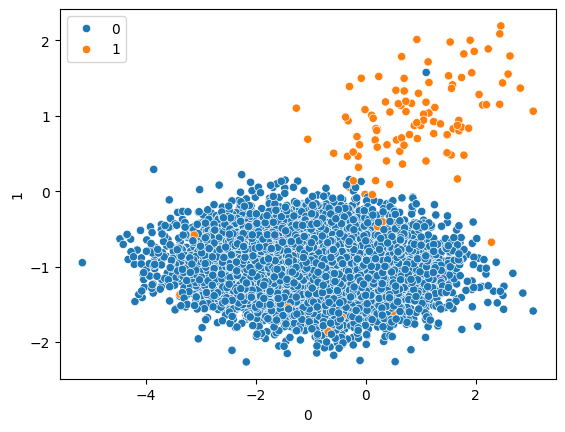

In [116]:
import pandas as pd
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue = y)

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75,random_state = 42)
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(7500, 2)
(7500,)

(2500, 2)
(2500,)


In [118]:
Counter(y)

Counter({np.int64(0): 9845, np.int64(1): 155})

In [119]:
model = LogisticRegression()
#penalty = ['l1','l2','elasticnet']
penalty = ['l2']

c_values = [100,10,1.0,0.1,0.01]
#solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
solvers = ['newton-cg','lbfgs','sag','saga']

class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

params = dict(penalty = penalty,C = c_values,solver = solvers ,class_weight = class_weight)
params

{'penalty': ['l2'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [120]:
cv = StratifiedKFold()
grid = GridSearchCV(estimator = logistic,param_grid = params,scoring ='accuracy',cv = cv,n_jobs = -1 )
grid.fit(x_train,y_train)
grid.best_score_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


np.float64(0.9933333333333334)

In [121]:
grid.best_params_

{'C': 10, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'saga'}

In [122]:
y_pred = grid.predict(x_test)
score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9944
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2478
           1       0.62      0.95      0.75        22

    accuracy                           0.99      2500
   macro avg       0.81      0.97      0.87      2500
weighted avg       1.00      0.99      0.99      2500

[[2465   13]
 [   1   21]]


In [123]:
y_pred = grid.predict_proba(x_test)[:,1]
y_pred

array([0.01256901, 0.0048404 , 0.0069307 , ..., 0.03385484, 0.0270487 ,
       0.02688489])

In [124]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

np.float64(0.7823934926768761)

In [125]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

Text(0, 0.5, 'True positive rate')

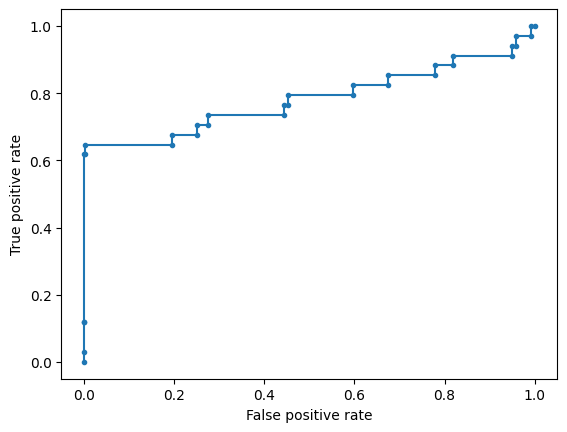

In [126]:
plt.plot(fpr,tpr,marker = '.')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

#Summary


*   Cost functions deviate from what is used in linear regression. Instead of MSE cross entropy or log loss cost functions are used to improve optimization outcomes. Optimization algorithms include LBFGS, Gradient descent etc.
*   Non optimization approaches can be to maximize the likelihood function. This is acheived by loosely multiplying the cost function above with -1 and maximizing it (instead of minimizing it).
*   Performace metrics
    - Confusion metrics
    - Accuracy = (TP + TN)/(TP + TN + FP + FN). This metric fails when we have an imbalanced dataset. For imbalance datasets metrics like precision and recall are helpful.
    - Precision = TP / (TP + FP) ex: spam mail classification
    - Recall = TP / (TP + FN) ex: covid test
    - F-beta score = (1+b^2) Precision * Recall/ (Precision + Recall) (Harmonic mean; b>1 -> recall is more important ; b<1 -> precision is more important)


*   Multiclass classification - Many algorithms like Logistic Regression, SVM, and Perceptron are inherently binary classifiers. To handle multi-class classification, two popular strategies are One-vs-Rest (OvR) and One-vs-One (OvO).


      *   One versus rest (OVR) - For each class, the model is trained to distinguish that class from all others. Prediction is made by selecting the class whose model outputs the highest confidence score.
      *   One versus one (OVO) - Splits the dataset into one binary problem for every pair of classes. Each model votes for a class; the class with the most votes is predicted. Often used with SVMs because they scale better with smaller datasets per model.   
      *   OvO can be faster per model but requires more models; OvR is simpler but each model handles more data.


